# AZ-204: Implement user authentication and authorization

In [1]:
import sys
sys.path.append('./../utils')
import ai

## Explore the Microsoft identity platform

In [2]:
%%learn
https://learn.microsoft.com/en-us/training/modules/explore-microsoft-identity-platform/

https://learn.microsoft.com/en-us/training/modules/explore-microsoft-identity-platform/1-introduction
https://learn.microsoft.com/en-us/training/modules/explore-microsoft-identity-platform/2-microsoft-identity-platform-overview
https://learn.microsoft.com/en-us/training/modules/explore-microsoft-identity-platform/3-app-service-principals
https://learn.microsoft.com/en-us/training/modules/explore-microsoft-identity-platform/4-permission-consent
https://learn.microsoft.com/en-us/training/modules/explore-microsoft-identity-platform/5-conditional-access


('',
 'https://learn.microsoft.com/en-us/training/modules/explore-microsoft-identity-platform/\n')

In [3]:
%%question
What is the difference between Authentication and Authorization?

Authentication is the process of verifying the identity of a user or entity, ensuring they are who they claim to be, typically through credentials like passwords, biometrics, or tokens.

Authorization, on the other hand, determines what an authenticated user or entity is allowed to do, controlling access to resources and actions based on permissions and roles.

In [4]:
%%question

Let's imagine I'm a developer and have build a web application using C# MVC pattern. 
I now want to make sure that only users from my organization (who are part of the sales security group) can access this application. 
What steps would I need to take? (keep it high level)

1. **Register the Application**: Register your web application in the Azure portal with Microsoft Entra ID to obtain a client ID and secret.

2. **Configure Authentication**: Use the Microsoft Authentication Library (MSAL) in your application to handle user authentication, ensuring the app can authenticate users with your organization’s Microsoft Entra ID.

3. **Set Up Authorization**: Implement role-based access control (RBAC) in your application. Check if the authenticated user belongs to the "sales" security group during the authorization phase.

4. **Conditional Access Policies**: Optionally, set up Conditional Access policies in Microsoft Entra ID to enforce restrictions like location or device compliance.

5. **Test Access**: Test the application to ensure only users from the "sales" security group can access it, verifying both authentication and authorization processes are working as intended.

In [5]:
%%question
Remove any single or double quotes and then visualize this using a Mermaid Flowchart

```mermaid
flowchart TD
    A[Register Application] --> B[Configure Authentication]
    B --> C[Set Up Authorization]
    C --> D[Conditional Access Policies]
    D --> E[Test Access]

    E --> F{User Belongs to Sales Group?}
    F -->|Yes| G[Allow Access]
    F -->|No| H[Deny Access]
```


In [6]:
%%question
Explain the different parts of this URL
https://login.microsoftonline.com/common/oauth2/authorize?client_id=00000002-0000-0ff1-ce00-000000000000&redirect_uri=https%3a%2f%2foutlook.office365.com%2fowa%2f&resource=00000002-0000-0ff1-ce00-000000000000&response_mode=form_post&response_type=code+id_token&scope=openid&msafed=1&msaredir=1&client-request-id=85184243-8ce9-3e1d-2e19-5557edebfc58&protectedtoken=true&claims=%7b%22id_token%22%3a%7b%22xms_cc%22%3a%7b%22values%22%3a%5b%22CP1%22%5d%7d%7d%7d&nonce=638689110421431834.00e5007f-4244-474b-88f3-13161e0bb222&state=Dcs7EoAgDEXRoONyIvk8IS5HZqC1dPumOLe7hYj2tKUiGerNo8WtKjCFazhOkXmJ9MUwgNExOGI5q2vTKWOYWcn3qO_31B8

Here's a breakdown of the URL components:

- **Scheme**: `https` - Indicates that the protocol used is HTTPS for secure communication.

- **Host**: `login.microsoftonline.com` - The domain name of the server handling the request.

- **Path**: `/common/oauth2/authorize` - The specific resource or page being requested on the server, indicating an OAuth 2.0 authorization request.

- **Query Parameters**: 
  - `client_id=00000002-0000-0ff1-ce00-000000000000` - The unique identifier for the application requesting authorization.
  - `redirect_uri=https%3a%2f%2foutlook.office365.com%2fowa%2f` - The URL to which the user will be redirected after authorization, URL-encoded.
  - `resource=00000002-0000-0ff1-ce00-000000000000` - The identifier of the resource the application is accessing.
  - `response_mode=form_post` - Specifies how the authorization response is returned to the application.
  - `response_type=code+id_token` - Indicates the type of response expected, such as an authorization code and ID token.
  - `scope=openid` - The permissions or access scope being requested, such as OpenID for identity verification.
  - `msafed=1` and `msaredir=1` - Custom parameters possibly related to Microsoft services.
  - `client-request-id=85184243-8ce9-3e1d-2e19-5557edebfc58` - A unique identifier for the request, useful for tracking and logging.
  - `protectedtoken=true` - Indicates whether the token should be protected.
  - `claims=%7b%22id_token%22%3a%7b%22xms_cc%22%3a%7b%22values%22%3a%5b%22CP1%22%5d%7d%7d%7d` - A JSON object, URL-encoded, specifying additional claims for the token.
  - `nonce=638689110421431834.00e5007f-4244-474b-88f3-13161e0bb222` - A unique value used to associate a client session with an ID token to mitigate replay attacks.
  - `state=Dcs7EoAgDEXRoONyIvk8IS5HZqC1dPumOLe7hYj2tKUiGerNo8WtKjCFazhOkXmJ9MUwgNExOGI5q2vTKWOYWcn3qO_31B8` - A value used to maintain state between the request and callback, often used for security purposes to prevent cross-site request forgery attacks.

In [8]:
%%question
What is an app registration?

An app registration is the process of registering an application with a cloud identity provider, like Microsoft Entra ID, to establish its identity and configure how it interacts with the provider's authentication and authorization services. It provides the app with credentials, such as a client ID and secret, and defines permissions and settings needed for secure API and resource access.

- **Client ID**: bae02d8b-3d09-4977-a6f4-f89335fb5af1
- **Tenant ID**: 0220dc76-d5f1-4b91-822d-7ca701087c68


https://login.microsoftonline.com/0220dc76-d5f1-4b91-822d-7ca701087c68/oauth2/v2.0/authorize?client_id=bae02d8b-3d09-4977-a6f4-f89335fb5af1&response_type=token&redirect_uri=http%3A%2F%2Flocalhost%2F&scope=openid%20offline_access%20https%3A%2F%2Fgraph.microsoft.com%2Fcalendars.readwrite&response_mode=fragment&state=12345&nonce=678910


In [9]:
%%question
What are the different parts of this URL?
https://login.microsoftonline.com/0220dc76-d5f1-4b91-822d-7ca701087c68/oauth2/v2.0/authorize?client_id=bae02d8b-3d09-4977-a6f4-f89335fb5af1&response_type=token&redirect_uri=http%3A%2F%2Flocalhost%2F&scope=openid%20offline_access%20https%3A%2F%2Fgraph.microsoft.com%2Fcalendars.readwrite&response_mode=fragment&state=12345&nonce=678910

Here's a breakdown of the URL components:

- **Scheme**: `https` - Indicates the use of HTTPS for secure communication.

- **Host**: `login.microsoftonline.com` - The domain handling the request, typically a Microsoft authentication server.

- **Path**: `/0220dc76-d5f1-4b91-822d-7ca701087c68/oauth2/v2.0/authorize` - Specifies the tenant ID (`0220dc76-d5f1-4b91-822d-7ca701087c68`) and indicates an OAuth 2.0 authorization request.

- **Query Parameters**: 
  - `client_id=bae02d8b-3d09-4977-a6f4-f89335fb5af1` - The unique identifier for the application making the request.
  - `response_type=token` - Specifies that the application expects an access token in response.
  - `redirect_uri=http%3A%2F%2Flocalhost%2F` - The URL to which the user will be redirected after authorization, URL-encoded.
  - `scope=openid%20offline_access%20https%3A%2F%2Fgraph.microsoft.com%2Fcalendars.readwrite` - The permissions being requested, including OpenID for authentication, offline access for refresh token, and read/write access to calendars on Microsoft Graph.
  - `response_mode=fragment` - Indicates the response should be returned in the URL fragment.
  - `state=12345` - A value used to maintain state between the request and callback, often for security to prevent cross-site request forgery.
  - `nonce=678910` - A unique value to associate a client session with an ID token, used to mitigate replay attacks.

In [10]:
%%question
Is this response_mode=fragment safe to use?

Yes, using `response_mode=fragment` is generally safe for client-side applications, such as single-page apps (SPAs), because it keeps sensitive information like access tokens within the browser and doesn't expose them in server logs. However, ensure your application implements additional security measures, such as validating tokens and using HTTPS, to protect against potential threats.

In [11]:
%%question
What is EPOCH

The term "Epoch" refers to the starting point used to measure time in computing. In the context of Unix-based systems, the Unix Epoch is January 1, 1970, at 00:00:00 UTC. Time is often represented as the number of seconds that have elapsed since this date and time. This representation is widely used in programming and data storage for its simplicity and uniformity.

In [ ]:
%%question
What information do I need to provide for a web application I'm currently developing?

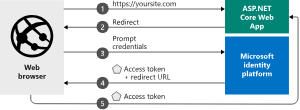

In [7]:
%%question
What is the purpose of OAuth 2.0 and OpenID Connect?

OAuth 2.0 is an authorization framework that enables third-party applications to obtain limited access to a user's resources without sharing the user's credentials. It provides secure delegated access by issuing tokens to client applications.

OpenID Connect is an identity layer built on top of OAuth 2.0. It adds authentication capabilities, allowing applications to verify the identity of users and obtain basic profile information via an ID token. Together, they enable secure and seamless authentication and authorization processes for applications.

In [35]:
%%question
Once I have registered my application, what do I need to do next?

Once you have registered your application, the next steps typically include:

1. **Configure Authentication**: Set up the authentication settings, such as redirect URIs and platform configurations, to ensure your app can interact with the Microsoft identity platform.

2. **Set Permissions**: Define the necessary API permissions your app needs to access. This includes both delegated and application permissions.

3. **Obtain Client Credentials**: If your app is a confidential client (like a web app or service), obtain client credentials such as a client secret or certificate for authentication.

4. **Implement Code**: Integrate the authentication library (like MSAL) into your application code to handle sign-in and token acquisition.

5. **Test the Integration**: Ensure that your application can successfully authenticate users and access the required resources.

6. **Deploy**: Deploy your application to the desired environment, ensuring all configurations are appropriately set for production use.

In [36]:
%%question
Can you explain the different parts of the following URL?

https://login.microsoftonline.com/647ba2b8-299c-40f8-8c90-ab6025efddc4/oauth2/v2.0/authorize?client_id=5982e68f-7dad-40a8-9c52-13ac111ede9d&response_type=token&redirect_uri=http%3A%2F%2Flocalhost%2F&scope=openid%20offline_access%20https%3A%2F%2Fgraph.microsoft.com%2Fcalendars.readwrite&response_mode=fragment&state=12345&nonce=678910

Certainly! Here's a breakdown of the parts of the URL:

- **https://login.microsoftonline.com/**: The base URL for Microsoft's OAuth 2.0 authorization endpoint.
- **647ba2b8-299c-40f8-8c90-ab6025efddc4**: The tenant ID that specifies which Azure tenant to authenticate against.
- **/oauth2/v2.0/authorize**: The path indicating that this is an OAuth 2.0 authorization request.
- **client_id=5982e68f-7dad-40a8-9c52-13ac111ede9d**: The client ID of the application requesting authentication.
- **response_type=token**: Indicates that the response should include an access token.
- **redirect_uri=http%3A%2F%2Flocalhost%2F**: The encoded URL to which the response will be sent after authentication.
- **scope=openid%20offline_access%20https%3A%2F%2Fgraph.microsoft.com%2Fcalendars.readwrite**: The permissions the application is requesting. Here, it includes OpenID, offline access (for refresh tokens), and read/write access to calendars via Microsoft Graph.
- **response_mode=fragment**: Specifies that the response should be returned in the URL fragment.
- **state=12345**: A value used by the client to maintain state between the request and callback. It helps prevent cross-site request forgery (CSRF) attacks.
- **nonce=678910**: A unique value included in the request to mitigate replay attacks and ensure the response is for the current request.

In [37]:
%%question
What kind of result I expect from the URL in the previous question?

You can expect the URL to result in a redirect to the specified `redirect_uri` with an access token included in the URL fragment. The access token is used by the application to authenticate API requests to resources like Microsoft Graph, based on the permissions requested in the `scope` parameter.

The redirected URL will look something like this:

```
http://localhost/#access_token=ACCESS_TOKEN&token_type=Bearer&expires_in=3600&scope=openid offline_access https://graph.microsoft.com/calendars.readwrite&state=12345
```

- `access_token`: Contains the OAuth 2.0 access token.
- `token_type`: Indicates the type of token, typically "Bearer".
- `expires_in`: The token's expiration time in seconds.
- `scope`: The scope of access granted by the token.
- `state`: The state value originally sent in the request, which is used to maintain state between the request and callback.

In [38]:
%%question
What is an ID token?

An ID token is a JSON Web Token (JWT) issued by an identity provider as part of the OpenID Connect authentication protocol. It contains claims about the user's identity, such as their unique user ID, email address, and authentication time. ID tokens are used by applications to verify the user's identity and obtain basic profile information. They do not grant access to resources; that's the role of access tokens.

In [39]:
%%question
What is an Access Token? Where should it be stored?

An access token is a credential used to authorize access to protected resources, such as APIs. It contains information about the user and the permissions granted, allowing applications to make authorized API requests on behalf of the user.

Access tokens should be stored securely to prevent unauthorized access. For web applications, they are typically stored in session storage or secure cookies. For mobile or desktop applications, they should be stored in secure storage mechanisms provided by the platform, such as the Keychain on iOS or the Keystore on Android.

In [40]:
%%question
In the previous URL, the access token was returned over the URL. Is this safe? How to solve this?

Returning an access token in the URL fragment is generally safe for single-page applications (SPAs) because the fragment is not sent to the server, and it remains in the client-side browser. However, it can expose the token to potential security risks if the URL is shared or logged.

To improve security:

1. **Use the Authorization Code Flow with PKCE**: This flow is more secure as it exchanges an authorization code for an access token server-side, and PKCE provides additional security to prevent interception.

2. **Store Tokens Securely**: Store tokens in secure, client-side storage mechanisms like session storage, and ensure they are not exposed through URLs.

3. **Implement HTTPS**: Always use HTTPS to encrypt data in transit and prevent interception by attackers.

In [41]:
%%question
How would I implement this in C#?

To implement the Authorization Code Flow with PKCE in C#, you can use the Microsoft Authentication Library (MSAL). Here's a high-level example:

1. **Install MSAL.NET**: Ensure you have the Microsoft Authentication Library installed via NuGet.

   ```bash
   Install-Package Microsoft.Identity.Client
   ```

2. **Configure your app registration**: Make sure your app is registered in Azure AD with the necessary redirect URIs and permissions.

3. **Use MSAL to authenticate**:

   ```csharp
   using Microsoft.Identity.Client;
   using System;
   using System.Threading.Tasks;

   class Program
   {
       private static string clientId = "your-client-id";
       private static string tenantId = "your-tenant-id";
       private static string redirectUri = "http://localhost"; // Ensure this matches your app registration

       static async Task Main(string[] args)
       {
           var app = PublicClientApplicationBuilder.Create(clientId)
               .WithAuthority(AzureCloudInstance.AzurePublic, tenantId)
               .WithRedirectUri(redirectUri)
               .Build();

           string[] scopes = { "User.Read" };

           var accessToken = await AuthenticateAsync(app, scopes);
           Console.WriteLine($"Access Token: {accessToken}");
       }

       private static async Task<string> AuthenticateAsync(IPublicClientApplication app, string[] scopes)
       {
           try
           {
               var accounts = await app.GetAccountsAsync();
               var result = await app.AcquireTokenSilent(scopes, accounts.FirstOrDefault())
                                     .ExecuteAsync();

               return result.AccessToken;
           }
           catch (MsalUiRequiredException)
           {
               var result = await app.AcquireTokenInteractive(scopes)
                                     .WithPrompt(Prompt.SelectAccount)
                                     .ExecuteAsync();

               return result.AccessToken;
           }
       }
   }
   ```

4. **Run the Application**: This code will prompt the user to log in and obtain an access token using the Authorization Code Flow. The access token will be printed to the console.

Remember to replace `"your-client-id"` and `"your-tenant-id"` with your actual client ID and tenant ID from your Azure app registration. Adjust the scopes as per your application's requirements.

In [12]:
%%question
I'm now part of a Role within the App Registration. How do I check in the c# code if the user is part of this role?

To check if a user is part of a specific role within an app registration in C#, you can follow these steps:

1. **Ensure Token Contains Roles**: First, make sure that your application is configured to receive role claims in the token. This is usually done in the app registration settings in Azure.

2. **Decode the Token**: Use a library like Microsoft.IdentityModel.Tokens to decode the JWT token.

3. **Check Role Claims**: Access the claims in the token to check if the user has the required role.

Here’s a simple example:

```csharp
using System.Linq;
using System.Security.Claims;

// Assume 'user' is a ClaimsPrincipal representing the authenticated user
public bool IsUserInRole(ClaimsPrincipal user, string roleName)
{
    return user.Claims.Any(c => c.Type == "roles" && c.Value == roleName);
}

// Usage
bool isInRole = IsUserInRole(User, "YourRoleName");
```

Ensure that your authentication middleware is correctly set up to populate the `ClaimsPrincipal` with claims from the token.

In [13]:
%%question
What if my application is written in Python?

If your application is written in Python, you can use libraries like `authlib` or `jwt` to decode and inspect the JWT token for role claims. Here’s a basic example using `authlib`:

1. **Ensure Token Contains Roles**: Make sure your application receives role claims in the token from the app registration settings in Azure.

2. **Decode the Token**: Use the `authlib` library to decode the JWT token.

3. **Check Role Claims**: Access the claims in the token to verify if the user is in the required role.

Here’s an example:

```python
from authlib.jose import jwt

def is_user_in_role(token, role_name):
    # Decode the JWT token
    claims = jwt.decode(token, 'your-public-key-here')
    
    # Check if the role is in the token's claims
    roles = claims.get('roles', [])
    return role_name in roles

# Usage
token = 'your-jwt-token-here'
is_in_role = is_user_in_role(token, 'YourRoleName')
```

Make sure to replace `'your-public-key-here'` with the appropriate key for verifying the token's signature. Also, ensure your application is correctly handling token acquisition and validation.

## Implement authentication by using the Microsoft Authentication Library

In [14]:
%%learn
https://learn.microsoft.com/en-us/training/modules/implement-authentication-by-using-microsoft-authentication-library/

https://learn.microsoft.com/en-us/training/modules/implement-authentication-by-using-microsoft-authentication-library/1-introduction
https://learn.microsoft.com/en-us/training/modules/implement-authentication-by-using-microsoft-authentication-library/2-microsoft-authentication-library-overview
https://learn.microsoft.com/en-us/training/modules/implement-authentication-by-using-microsoft-authentication-library/3-initialize-client-applications
https://learn.microsoft.com/en-us/training/modules/implement-authentication-by-using-microsoft-authentication-library/4-interactive-authentication-msal


('',
 'https://learn.microsoft.com/en-us/training/modules/implement-authentication-by-using-microsoft-authentication-library/\n')

In [15]:
%%question
Can you explain what is a service principal, an app registration and an Enterprise Application in Microsoft Entra ID? 

Certainly! 

- **Service Principal**: This is an instance of an application in a specific tenant and defines what the app can do in that tenant. It represents the application's identity when accessing resources within the tenant.

- **App Registration**: This is the process of registering an application with Microsoft Entra ID, which creates an application object. This object acts as a blueprint for creating service principals in any tenant where the application is used.

- **Enterprise Application**: This typically refers to the service principal object within a tenant. It represents the application in that specific tenant and includes configuration settings such as single sign-on and user assignments.

In [16]:
%%question
How does it compare between these? Provide this in a table format.

| Aspect                           | App Registration                               | Service Principal                          | Enterprise Application                           |
|----------------------------------|------------------------------------------------|--------------------------------------------|---------------------------------------------------|
| **Purpose**                      | Registers the app with Microsoft Entra ID      | Represents app identity in a specific tenant | Represents the application within a tenant       |
| **Scope**                        | Global (across all tenants)                    | Local (specific to a tenant)               | Local (specific to a tenant)                      |
| **Created By**                   | Developer during app registration              | Automatically when app is used in a tenant | Automatically when app is used in a tenant        |
| **Contains**                     | App configurations like redirect URIs          | Permissions, access policies for the app   | Configuration settings like SSO and user assignments |
| **Use Case**                     | To define app globally and its capabilities     | To define what app can do in a tenant      | To manage app-specific settings in a tenant       |



In [17]:
%%question
Are service principals the same as app registrations?

No, service principals and app registrations are not the same. 

- **App Registration** is the process of registering an application with Microsoft Entra ID, creating a global application object that acts as a blueprint.

- **Service Principal** is the local representation of the app within a specific tenant, created based on the app registration. It defines the app's identity and permissions in that tenant.

In [18]:
%%question
Who can provide consent?

Consent can be provided by:

- **Users**: They can consent to permissions that an application requests, which apply to their own data.
- **Administrators**: They can provide consent on behalf of all users in the organization, especially for higher-privilege permissions that require admin consent.

In [19]:
%%question
What are some example of higher privileges that administrators need to provide consent on behalf?

Some examples of higher-privilege permissions that require administrator consent include:

- **Read and write all users' profiles**: Access to all users' profiles in the organization.
- **Read and write all directory data**: Access to directory data across the organization.
- **Send mail as any user**: The ability to send emails on behalf of any user.
- **Read and write all groups**: Access to read and modify all groups in the organization.
- **Read all usage reports**: Access to read usage reports for the organization.

In [20]:
%%question
What is incremental and dynamic user consent?

Incremental and dynamic user consent allows applications to request permissions as needed, rather than all at once during initial sign-in. This means:

- **Incremental Consent**: Apps can start with minimal permissions and request additional permissions over time as new features are accessed by the user.

- **Dynamic Consent**: Apps can dynamically request permissions that were not predefined in the application registration, prompting users to consent only to newly requested permissions. This approach helps avoid overwhelming users with a long list of permissions at first login.

In [21]:
%%question
Can you share some example authentication flows?

Sure! Here are some example authentication flows:

1. **Authorization Code Flow**: Used by web apps and SPAs where a user signs in and receives an authorization code, which is then exchanged for an access token.

2. **Implicit Flow**: Used by SPAs where access tokens are returned directly without an intermediate authorization code. (Note: This flow is less recommended now in favor of authorization code flow with PKCE.)

3. **Client Credentials Flow**: Used by server-to-server applications where the app itself authenticates and receives a token, without user involvement.

4. **Resource Owner Password Credentials (ROPC) Flow**: Directly collects user credentials to obtain an access token. Not recommended due to security concerns.

5. **Device Code Flow**: Used by devices with limited input capabilities, allowing users to authenticate on a separate device.

6. **On-Behalf-Of (OBO) Flow**: Used when an app needs to access a downstream API on behalf of a user authenticated by an upstream API.

In [22]:
%%question
Can you share an example in C# using the Device Code Flow?

Certainly! Below is a basic example in C# using the Microsoft Authentication Library (MSAL) to implement the Device Code Flow:

```csharp
using Microsoft.Identity.Client;
using System;
using System.Threading.Tasks;

class Program
{
    private static string clientId = "your-client-id";
    private static string tenantId = "your-tenant-id";
    private static string[] scopes = new string[] { "user.read" };

    static async Task Main(string[] args)
    {
        var app = PublicClientApplicationBuilder.Create(clientId)
            .WithTenantId(tenantId)
            .WithAuthority(AzureCloudInstance.AzurePublic, tenantId)
            .Build();

        try
        {
            var result = await app.AcquireTokenWithDeviceCode(scopes, deviceCodeResult =>
            {
                Console.WriteLine(deviceCodeResult.Message);
                return Task.FromResult(0);
            }).ExecuteAsync();

            Console.WriteLine($"Access Token: {result.AccessToken}");
        }
        catch (MsalException ex)
        {
            Console.WriteLine($"Error acquiring token: {ex.Message}");
        }
    }
}
```

In this example:
- Replace `"your-client-id"` and `"your-tenant-id"` with your application's client and tenant IDs.
- When you run the code, it will output a URL and a device code. You must navigate to the URL and enter the device code to authenticate.
- The access token is printed once authentication is successful.

## Implement shared access signatures

In [23]:
%%learn
https://learn.microsoft.com/en-us/training/modules/implement-shared-access-signatures/

https://learn.microsoft.com/en-us/training/modules/implement-shared-access-signatures/1-introduction
https://learn.microsoft.com/en-us/training/modules/implement-shared-access-signatures/2-shared-access-signatures-overview
https://learn.microsoft.com/en-us/training/modules/implement-shared-access-signatures/3-shared-access-signatures
https://learn.microsoft.com/en-us/training/modules/implement-shared-access-signatures/4-stored-access-policies


('',
 'https://learn.microsoft.com/en-us/training/modules/implement-shared-access-signatures/\n')

In [24]:
%%question
What are possible approaches to get authenticated access to a blob in an Azure Storage account? Output in a table


| Approach                     | Description                                                                                           |
|-------------------------------|-------------------------------------------------------------------------------------------------------|
| Storage Account Key           | Use the account key directly to access the storage account.                                             |
| Shared Access Signature (SAS) | Generate a SAS token to provide limited access to the storage account resources for a specific time.    |
| Azure AD Authentication       | Use Microsoft Entra ID to authenticate and authorize access to the storage account.                     |
| Managed Identities            | Use Azure Managed Identities to access storage without storing credentials directly in your application.|
| Access Control Lists (ACLs)   | Set up ACLs on the container or blob level to control access.                                           |
| Role-Based Access Control     | Use RBAC to assign users roles that define their access level to storage resources.                     |

- OAuth / Entra ID (RBAC)
- Access Key (Account Key) -  safe ?? can be compromised / configuration disable
- SAS Shared Access Signature
- Anonymous !!

In [25]:
%%question
Why would I use a Shared Access Signature?

A Shared Access Signature (SAS) allows you to grant limited and controlled access to your Azure Storage resources without sharing your account keys. It provides a secure way for clients to perform specific operations, like read, write, or delete, for a defined period and scope, reducing the risk of unauthorized access.

In [ ]:
%%question
At what level of the storage account can I create a Shared Access Signature?

```txt
- Storage Account (first level)
| - Service (blob/table/file/queue) (second level)
|  | - Container / Blob (third level)
```

In [42]:
%%question
What are the different parts of the SAS token?



A SAS token consists of several components that specify the permissions and constraints for accessing Azure Storage resources. Here are the typical parts of a SAS token:

1. **sp**: Permissions granted by the SAS, such as read (r), write (w), delete (d), add (a), create (c), list (l).
2. **st**: Start time when the SAS becomes valid.
3. **se**: Expiry time when the SAS ceases to be valid.
4. **spr**: Protocol allowed for accessing the resource, typically HTTPS.
5. **sv**: Storage service version to use.
6. **sr**: Resource type, e.g., b for blob, c for container.
7. **sig**: The cryptographic signature, which authorizes access and is generated based on the SAS parameters and the storage account key.
8. **sip**: (Optional) IP range from which the SAS can be used.
9. **si**: (Optional) Identifier for a stored access policy.
10. **skoid**, **sktid**, **skt**, **ske**, **sks**: (Optional) Parameters used for key-specific SAS, such as key's object ID, tenant ID, start time, expiry, and service version.

These components collectively define the scope and security of the SAS token.

In [27]:
%%question
Should you set expiration time of the SAS as long as possible, or rather go for the smaller usefull time. Why?

You should set the expiration time of the SAS to the smallest useful time. This minimizes the risk of unauthorized access if the SAS token is compromised, as it limits the window during which the token can be used.

In [28]:
%%question
What do I need to do if the SAS token is compromised?

If the SAS token is compromised, you should:

1. **Revoke the SAS**: If you used a stored access policy to generate the SAS, modify or delete the policy to immediately revoke access.
2. **Regenerate Account Keys**: If the SAS was not based on a stored access policy, consider regenerating your account keys to invalidate the compromised token.
3. **Review Access Logs**: Check the access logs to identify any unauthorized access or suspicious activity.
4. **Implement Security Measures**: Assess and improve security practices, such as using HTTPS for SAS token distribution and setting shorter expiration times in the future.

In [29]:
%%question
If I work with User Delegation SAS, is there a possibility that the SAS token gets compromised?

Yes, there is always a possibility that any SAS token, including a User Delegation SAS, can get compromised if not properly secured. However, using a User Delegation SAS with Microsoft Entra credentials enhances security compared to using shared keys. To minimize risks, always use HTTPS to transmit the SAS, set the shortest feasible expiration time, and grant the minimum necessary permissions.

In [30]:
%%question
When is SAS not the correct solution?

A SAS is not the correct solution when:

1. **High Security Concerns**: If the risk of the SAS being intercepted or misused is too high, it's better to use more secure methods like Azure AD authentication.
   
2. **Complex Access Requirements**: When access control is complex and involves intricate business rules that a SAS cannot handle.

3. **Revocation Needs**: If you need the ability to instantly revoke access across many users, as SAS tokens cannot be revoked individually unless they are tied to a stored access policy.

4. **Long-Term Access**: For long-term or permanent access, consider more stable and manageable access control methods, like role-based access control (RBAC).

In such cases, creating a middle-tier service to manage access might be more appropriate.

In [43]:
%%question
What would happen if I manually extend the "se" time in the URL to a day in the far future?

If you manually extend the "se" (expiry time) in the SAS token URL to a day in the far future, it won't affect the actual expiry of the token unless the signature ("sig") is also recalculated with the new expiry time using the storage account key. The "sig" parameter ensures that any unauthorized changes to the token parameters, such as the expiry time, are invalid. Therefore, tampering with the expiry time without updating the signature will result in an invalid SAS token, and access will be denied.

In [33]:
%%question
Who would need to generate a SAS token?

Developers or administrators who need to grant temporary, limited access to Azure Storage resources would typically generate a SAS token. This is often done in scenarios where client applications or external users need to access specific resources, like blobs or files, without exposing the storage account keys.

In [34]:
%%question
Can you show me an example of a python web app issuing a SAS token?

Certainly! Below is a simple example of a Python web app using Flask to issue a SAS token for accessing an Azure Blob Storage container. This example uses the `azure-storage-blob` library.

First, ensure you have the necessary package installed:

```bash
pip install azure-storage-blob Flask
```

Here's the example code:

```python
from flask import Flask, jsonify
from azure.storage.blob import BlobServiceClient, generate_blob_sas, BlobSasPermissions
from datetime import datetime, timedelta
import os

app = Flask(__name__)

# Set your Azure Storage account details
STORAGE_ACCOUNT_NAME = 'your_storage_account_name'
STORAGE_ACCOUNT_KEY = 'your_storage_account_key'
CONTAINER_NAME = 'your_container_name'

@app.route('/generate-sas')
def generate_sas_token():
    try:
        sas_token = generate_blob_sas(
            account_name=STORAGE_ACCOUNT_NAME,
            container_name=CONTAINER_NAME,
            account_key=STORAGE_ACCOUNT_KEY,
            permission=BlobSasPermissions(read=True, write=True),
            expiry=datetime.utcnow() + timedelta(hours=1)  # Token valid for 1 hour
        )
        return jsonify({"sas_token": sas_token})
    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)
```

Replace `'your_storage_account_name'`, `'your_storage_account_key'`, and `'your_container_name'` with your actual Azure Storage account name, key, and container name.

This Flask app defines an endpoint `/generate-sas` that, when accessed, generates a SAS token granting read and write permissions to the specified blob container for 1 hour. The token is returned as a JSON response.

In [32]:
%%question
How do I know whether the SAS token has been compromised?

To determine if a SAS token has been compromised, you can:

1. **Monitor Access Logs**: Analyze logs for unusual or unauthorized access patterns, such as access from unexpected locations or times.

2. **Set Up Alerts**: Implement alerts for suspicious activities, like excessive access attempts or data downloads.

3. **Review Resource Usage**: Check for unusual spikes in resource usage that may indicate unauthorized access.

4. **Use Azure Security Features**: Utilize Azure's security features and services, such as Azure Security Center, to detect and respond to potential threats.

In [31]:
%%question
What is a Stored Access Policy and why would I use this?

A Stored Access Policy is a server-side feature in Azure Storage that allows you to manage Shared Access Signatures (SAS) more effectively. It defines parameters such as start time, expiry time, and permissions for a SAS. 

**Why use it:**
- **Centralized Management**: Allows you to manage and update SAS settings in one place without modifying each SAS token individually.
- **Revocation**: You can easily revoke access by changing or deleting the policy.
- **Security**: Helps enforce consistent security practices across multiple SAS tokens.
- **Flexibility**: You can change permissions or expiry times without needing to issue new SAS tokens.

## Explore Microsoft Graph

In [44]:
%%learn
https://learn.microsoft.com/en-us/training/modules/microsoft-graph/

https://learn.microsoft.com/en-us/training/modules/microsoft-graph/1-introduction
https://learn.microsoft.com/en-us/training/modules/microsoft-graph/2-microsoft-graph-overview
https://learn.microsoft.com/en-us/training/modules/microsoft-graph/3-microsoft-graph-api
https://learn.microsoft.com/en-us/training/modules/microsoft-graph/4-microsoft-graph-sdk
https://learn.microsoft.com/en-us/training/modules/microsoft-graph/5-microsoft-graph-best-practices


('', 'https://learn.microsoft.com/en-us/training/modules/microsoft-graph/\n')

In [45]:
%%question
Give me an example of a HTTP REST API to fetch the user's calendar entries, using the Microsoft Graph API

To fetch a user's calendar entries using the Microsoft Graph API, you can make an HTTP GET request to the following endpoint:

```
GET https://graph.microsoft.com/v1.0/me/events
```

Here's an example of how you might make this request using `curl`:

```bash
curl -X GET \
  https://graph.microsoft.com/v1.0/me/events \
  -H 'Authorization: Bearer YOUR_ACCESS_TOKEN' \
  -H 'Accept: application/json'
```

Replace `YOUR_ACCESS_TOKEN` with a valid OAuth 2.0 access token that has the `Calendars.Read` permission. This token should be included in the `Authorization` header as a Bearer token. The response will include the user's calendar events in JSON format.

In [ ]:
%%question
What other interesting data can I retrieve from the Microsoft Graph?

In [ ]:
%%question
Can you use this also to for example create meeting invites?

In [ ]:
%%question
Can you share an example on how to use this to retrieve a table from an excel file?

In [46]:
%%question
Show me now how to do this using C#

To fetch a user's calendar entries using C# with the Microsoft Graph SDK, follow these steps:

1. **Install Microsoft Graph SDK**: Add the Microsoft Graph SDK to your project via NuGet.

   ```bash
   Install-Package Microsoft.Graph
   ```

2. **Set up authentication**: Implement authentication using MSAL to acquire an access token.

3. **Fetch Calendar Entries**: Use the GraphServiceClient to retrieve events.

Here's an example code snippet:

```csharp
using Microsoft.Graph;
using Microsoft.Identity.Client;
using System;
using System.Net.Http.Headers;
using System.Threading.Tasks;

class Program
{
    private static string clientId = "YOUR_CLIENT_ID";
    private static string tenantId = "YOUR_TENANT_ID";
    private static string clientSecret = "YOUR_CLIENT_SECRET";

    static async Task Main(string[] args)
    {
        // Initialize the confidential client application
        IConfidentialClientApplication confidentialClientApplication = ConfidentialClientApplicationBuilder
            .Create(clientId)
            .WithTenantId(tenantId)
            .WithClientSecret(clientSecret)
            .Build();

        // Authenticate and acquire a token for Microsoft Graph
        var authProvider = new ClientCredentialProvider(confidentialClientApplication);

        // Initialize GraphServiceClient with the auth provider
        GraphServiceClient graphClient = new GraphServiceClient(authProvider);

        // Fetch the user's calendar events
        var events = await graphClient.Me.Events
            .Request()
            .GetAsync();

        // Print event details
        foreach (var calendarEvent in events)
        {
            Console.WriteLine($"Subject: {calendarEvent.Subject}");
            Console.WriteLine($"Start: {calendarEvent.Start.DateTime}");
            Console.WriteLine($"End: {calendarEvent.End.DateTime}");
            Console.WriteLine(new string('-', 40));
        }
    }
}
```

Make sure to replace `YOUR_CLIENT_ID`, `YOUR_TENANT_ID`, and `YOUR_CLIENT_SECRET` with your Azure AD app registration details. This example uses client credentials flow, suitable for apps without user interaction. Adjust the authentication flow if user interaction is required.